# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
type_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
type_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
print(type_fare_sum)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [6]:
# join Series together for calculation of new columns
type_df = type_fare_sum.to_frame().join(type_driver_count).join(type_ride_count)
type_df

,fare,driver_count,ride_id
type,,,
Rural,4327.93,537,125
Suburban,19356.33,8570,625
Urban,39854.38,59602,1625


In [7]:
#  4. Get the average fare per ride for each city type. 
type_df['Average Fare per Ride'] = type_df['fare'] / type_df['ride_id']
type_df

,fare,driver_count,ride_id,Average Fare per Ride
type,,,,
Rural,4327.93,537,125,34.623440
Suburban,19356.33,8570,625,30.970128
Urban,39854.38,59602,1625,24.525772


In [8]:
# 5. Get the average fare per driver for each city type. 
type_df['Average Fare per Driver'] = type_df['fare'] / type_df['driver_count']
type_df

,fare,driver_count,ride_id,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,4327.93,537,125,34.623440,8.059460
Suburban,19356.33,8570,625,30.970128,2.258615
Urban,39854.38,59602,1625,24.525772,0.668675


In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = type_df

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df

,fare,driver_count,ride_id,Average Fare per Ride,Average Fare per Driver
Rural,4327.93,537,125,34.623440,8.059460
Suburban,19356.33,8570,625,30.970128,2.258615
Urban,39854.38,59602,1625,24.525772,0.668675


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
weekly_linechart_df = pyber_data_df
weekly_linechart_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
weekly_linechart_df = weekly_linechart_df.groupby(['date', 'type']).sum()[['fare']]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
weekly_linechart_df = weekly_linechart_df.reset_index()
weekly_linechart_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
pivot_weekly = pd.pivot_table(weekly_linechart_df,index=['date'],columns=['type'],values=['fare'])

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# create new dataframe
pivot_weekly_dateframe = (pivot_weekly.loc[(pivot_weekly.index>='2019-01-01') 
                                          & (pivot_weekly.index<='2019-04-29')])
pivot_weekly_dateframe.index.name = 'date'

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pivot_weekly_dateframe.index = pd.to_datetime(pivot_weekly_dateframe.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_weekly_dateframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_weekly_dataframe_resample = pivot_weekly_dateframe.resample('W').sum()

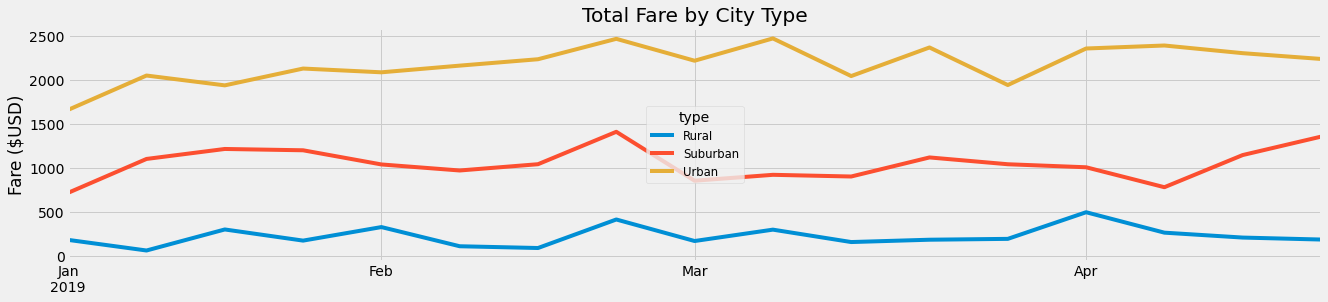

In [41]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pivot_weekly_dataframe_resample.plot.line(title="Total Fare by City Type", xlabel="", 
                                          ylabel="Fare ($USD)", figsize=(20,4))
plt.legend(labels=['Rural', 'Suburban', 'Urban'], title='type', loc='center', fontsize='small')


plt.savefig('analysis/fare_by_type.png')